In [34]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors


In [35]:
# reference: https://benalexkeen.com/k-means-clustering-in-python/

In [49]:
### Initialisation
df_features = pd.read_json ('/Users/hedayattabesh/Documents/scripts/Meme-Analysis/data/Emillie_memes_features.json')

# Testing
df_features = df_features

In [50]:
# create df with X, Y cordinates <- this will make it easier to handle the cordinates
feature_cordinates = pd.DataFrame(columns=['X','Y','path'])
for index, row in df_features.iterrows():
    new_row = {'X':row[1][0], 'Y':row[1][1], 'path':row[0]}
    feature_cordinates = feature_cordinates.append(new_row, ignore_index=True)

feature_cordinates

,X,Y,path
0,0.932755,0.565863,/Users/hedayattabesh/Documents/Data/memes/maps...
1,0.825804,0.678224,/Users/hedayattabesh/Documents/Data/memes/maps...
2,0.934999,0.570641,/Users/hedayattabesh/Documents/Data/memes/maps...
3,0.768596,0.640477,/Users/hedayattabesh/Documents/Data/memes/maps...
4,0.794227,0.677957,/Users/hedayattabesh/Documents/Data/memes/maps...
...,...,...,...
2692,0.498858,0.868977,/Users/hedayattabesh/Documents/Data/memes/stat...
2693,0.610671,0.821983,/Users/hedayattabesh/Documents/Data/memes/stat...
2694,0.369144,0.748524,/Users/hedayattabesh/Documents/Data/memes/stat...
2695,0.261944,0.739705,/Users/hedayattabesh/Documents/Data/memes/stat...


In [76]:
# for plotting later
colors_temp = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = {}
for i, color in enumerate(colors_temp):
    colors[i] = color
colors

{0: 'b',
 1: 'g',
 2: 'r',
 3: 'c',
 4: 'm',
 5: 'y',
 6: 'k',
 7: 'w',
 8: 'aliceblue',
 9: 'antiquewhite',
 10: 'aqua',
 11: 'aquamarine',
 12: 'azure',
 13: 'beige',
 14: 'bisque',
 15: 'black',
 16: 'blanchedalmond',
 17: 'blue',
 18: 'blueviolet',
 19: 'brown',
 20: 'burlywood',
 21: 'cadetblue',
 22: 'chartreuse',
 23: 'chocolate',
 24: 'coral',
 25: 'cornflowerblue',
 26: 'cornsilk',
 27: 'crimson',
 28: 'cyan',
 29: 'darkblue',
 30: 'darkcyan',
 31: 'darkgoldenrod',
 32: 'darkgray',
 33: 'darkgreen',
 34: 'darkgrey',
 35: 'darkkhaki',
 36: 'darkmagenta',
 37: 'darkolivegreen',
 38: 'darkorange',
 39: 'darkorchid',
 40: 'darkred',
 41: 'darksalmon',
 42: 'darkseagreen',
 43: 'darkslateblue',
 44: 'darkslategray',
 45: 'darkslategrey',
 46: 'darkturquoise',
 47: 'darkviolet',
 48: 'deeppink',
 49: 'deepskyblue',
 50: 'dimgray',
 51: 'dimgrey',
 52: 'dodgerblue',
 53: 'firebrick',
 54: 'floralwhite',
 55: 'forestgreen',
 56: 'fuchsia',
 57: 'gainsboro',
 58: 'ghostwhite',
 59: 'go

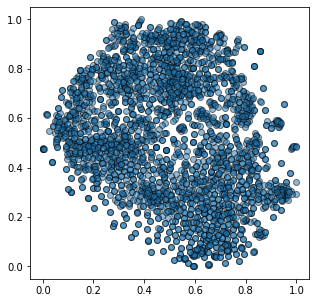

In [77]:
## Repeat Assigment Stag
# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(feature_cordinates['X'], feature_cordinates['Y'], alpha=0.5, edgecolor='k')
# for i in centroids.keys():
#     plt.scatter(*centroids[i], color=colmap[i])

In [78]:
# now lets do the same thing but with the libraries
kmeans = KMeans(n_clusters=20)
kmeans.fit(feature_cordinates[['X', 'Y']])

KMeans(n_clusters=20)

In [79]:
labels = kmeans.predict(feature_cordinates[['X', 'Y']])
centroids = kmeans.cluster_centers_

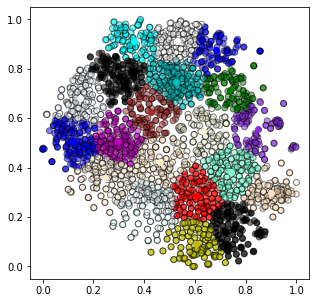

In [82]:
fig = plt.figure(figsize=(5, 5))

colors_map = map(lambda x: colors[x], labels)

plt.scatter(feature_cordinates['X'], feature_cordinates['Y'], color=list(colors_map), alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colors[idx])

In [83]:
# now that we have a feel for it lets calculate some satistics 
kmean_clusters = []

wcss = []
silhouette_avg_scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(feature_cordinates[['X', 'Y']])
    labels = kmeans.predict(feature_cordinates[['X', 'Y']])
    kmean_clusters.append(kmeans)
    wcss.append(kmeans.inertia_)
    silhouette_avg_scores.append(silhouette_score(feature_cordinates[['X', 'Y']], labels))

kmean_clusters 

[KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

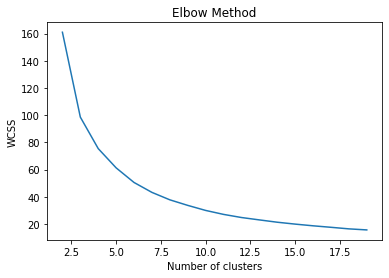

In [84]:
# The total WSS measures the compactness of the clustering and we want it to be as small as possible.
# We are looking for where the curve bends
plt.plot(range(2, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

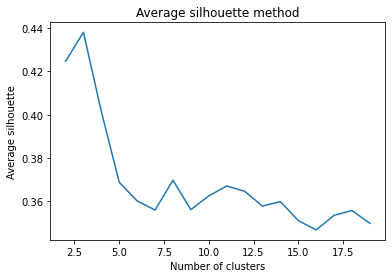

In [85]:
# determines how well each object lies within its cluster
# The location of the maximum is considered as the appropriate number of clusters.
plt.plot(range(2, 20), silhouette_avg_scores)
plt.title('Average silhouette method')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

In [127]:
from sklearn.cluster import DBSCAN
import numpy as np

clustering = DBSCAN(eps=.03999, min_samples=2).fit(feature_cordinates[['X', 'Y']])

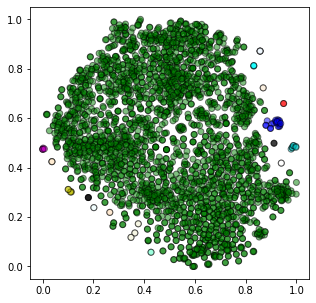

In [128]:
colors_temp = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
colors = {}
for i, color in enumerate(colors_temp):
    colors[i] = color
    
fig = plt.figure(figsize=(5, 5))

colors_map = map(lambda x: colors[x], clustering.labels_)

plt.scatter(feature_cordinates['X'], feature_cordinates['Y'], color=list(colors_map), alpha=0.5, edgecolor='k')
# for idx, centroid in enumerate(centroids):
#     plt.scatter(*centroid, color=colmap[idx])

In [124]:
clustering.labels_

array([0, 1, 0, ..., 1, 1, 1])

In [74]:
colors
    